Playing around with TrueSkill package

In [32]:
import trueskill as ts
import numpy as np
import matplotlib.pyplot as plt

# One-on-one, one player continues to win

In [38]:
r1 = ts.Rating()
r2 = ts.Rating()
r1, r2

(trueskill.Rating(mu=25.000, sigma=8.333),
 trueskill.Rating(mu=25.000, sigma=8.333))

In [39]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
for i in range(N):
    r1s[i] = r1.mu
    r2s[i] = r2.mu
    r1, r2 = ts.rate_1vs1(r1, r2)

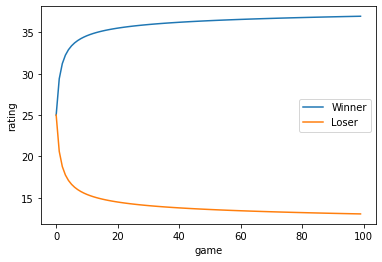

In [42]:
fig, ax = plt.subplots()
ax.plot(r1s, label='Winner')
ax.plot(r2s, label='Loser')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Free-for-all, same placing

In [57]:
r1 = (ts.Rating(),)
r2 = (ts.Rating(),)
r3 = (ts.Rating(),)
r4 = (ts.Rating(),)
r1, r2, r3, r4

((trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),))

In [58]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
r3s = np.empty(N)
r4s = np.empty(N)
for i in range(N):
    r1s[i] = r1[0].mu
    r2s[i] = r2[0].mu
    r3s[i] = r3[0].mu
    r4s[i] = r4[0].mu
    r1, r2, r3, r4 = ts.rate([r1, r2, r3, r4])

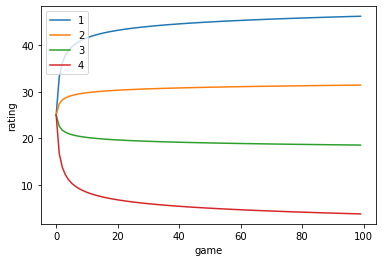

In [60]:
fig, ax = plt.subplots()
ax.plot(r1s, label='1')
ax.plot(r2s, label='2')
ax.plot(r3s, label='3')
ax.plot(r4s, label='4')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Free-for-all, random placing

In [85]:
import random

In [86]:
r1 = (ts.Rating(),)
r2 = (ts.Rating(),)
r3 = (ts.Rating(),)
r4 = (ts.Rating(),)
r1, r2, r3, r4

((trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),))

In [87]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
r3s = np.empty(N)
r4s = np.empty(N)
for i in range(N):
    r1s[i] = r1[0].mu
    r2s[i] = r2[0].mu
    r3s[i] = r3[0].mu
    r4s[i] = r4[0].mu
    placing = [r1, r2, r3, r4]
    random.shuffle(placing)
    r1, r2, r3, r4 = ts.rate(placing)

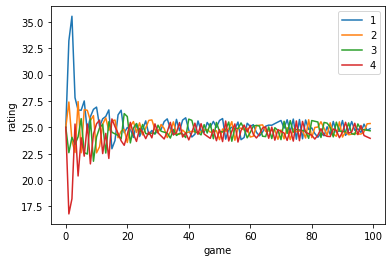

In [88]:
fig, ax = plt.subplots()
ax.plot(r1s, label='1')
ax.plot(r2s, label='2')
ax.plot(r3s, label='3')
ax.plot(r4s, label='4')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Custom environment

In [103]:
env = ts.TrueSkill(draw_probability=0)

In [108]:
env.beta

4.166666666666667

In [104]:
r1 = (env.create_rating(),)
r2 = (env.create_rating(),)
r3 = (env.create_rating(),)
r4 = (env.create_rating(),)
r1, r2, r3, r4

((trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),),
 (trueskill.Rating(mu=25.000, sigma=8.333),))

In [105]:
N = 100
r1s = np.empty(N)
r2s = np.empty(N)
r3s = np.empty(N)
r4s = np.empty(N)
for i in range(N):
    r1s[i] = r1[0].mu
    r2s[i] = r2[0].mu
    r3s[i] = r3[0].mu
    r4s[i] = r4[0].mu
    placing = [r1, r2, r3, r4]
    random.shuffle(placing)
    r1, r2, r3, r4 = ts.rate(placing)

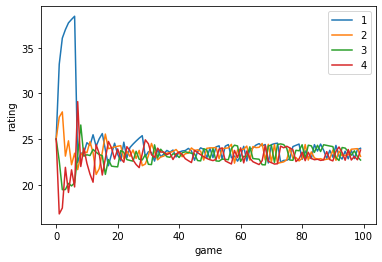

In [106]:
fig, ax = plt.subplots()
ax.plot(r1s, label='1')
ax.plot(r2s, label='2')
ax.plot(r3s, label='3')
ax.plot(r4s, label='4')
ax.set_xlabel('game')
ax.set_ylabel('rating')
ax.legend(loc='best')

# Win probability, from docs

In [114]:
def win_probability(a, b):                                                      
    deltaMu = sum([x.mu for x in a]) - sum([x.mu for x in b])                   
    sumSigma = sum([x.sigma ** 2 for x in a]) + sum([x.sigma ** 2 for x in b])  
    playerCount = len(a) + len(b)                                               
    denominator = np.sqrt(playerCount * (env.beta * env.beta) + sumSigma)             
    return env.cdf(deltaMu / denominator)  

In [125]:
win_probability((env.create_rating(30),), (env.create_rating(25),))

0.6478317969284113

## Extension to 3 players
https://github.com/sublee/trueskill/issues/35

In [154]:
env = ts.TrueSkill(draw_probability=0)

In [150]:
a = (env.create_rating(20),)
b = (env.create_rating(25),)
c = (env.create_rating(30),)

In [156]:
# Pairwise comparisons:
# P (a beats b)
win_probability(a, b)

0.35216820307158875

In [157]:
# P (b beats c)
win_probability(b, c)

0.35216820307158875

In [161]:
# P (a beats c)
win_probability(a, c)

0.22394222940798758

In [ ]:
# P(abc) = P (ab | bc) * P(bc)
